In [ ]:
# Implement Image Denoising Using Autoencoders on MNIST Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

In [2]:
# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the images to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape the images to include the channel dimension
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [3]:
def add_noise(images):
    noise_factor = 0.5 
    noisy_images = images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=images.shape)
    noisy_images = np.clip(noisy_images, 0., 1.)
    return noisy_images

# Create noisy datasets
x_train_noisy = add_noise(x_train)
x_test_noisy = add_noise(x_test)

In [4]:
# Build the autoencoder model
autoencoder = keras.models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Conv2D(8, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Conv2D(8, (3, 3), activation='relu', padding='same'),
    layers.UpSampling2D((2, 2)),
    layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
    layers.UpSampling2D((2, 2)),
    layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')
])

In [5]:
# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model
history = autoencoder.fit(x_train_noisy, x_train,
                          epochs=50,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test_noisy, x_test))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 52ms/step - loss: 0.4252 - val_loss: 0.1580
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 50ms/step - loss: 0.1517 - val_loss: 0.1370
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 49ms/step - loss: 0.1363 - val_loss: 0.1299
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 50ms/step - loss: 0.1303 - val_loss: 0.1254
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 0.1259 - val_loss: 0.1221
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 0.1224 - val_loss: 0.1192
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 0.1202 - val_loss: 0.1175
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 0.1185 - val_loss: 0.1160
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.1168 - val_loss: 0.1145
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - loss: 0.1155 - val_loss: 0.1135
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.1148 - val_loss: 0.1127
Epoch 12/50
235/235 ━━━━━━━━━━

In [6]:
# Evaluate the model on test data
loss = autoencoder.evaluate(x_test_noisy, x_test)
print(f'Test loss: {loss}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1048
Test loss: 0.10523725301027298


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


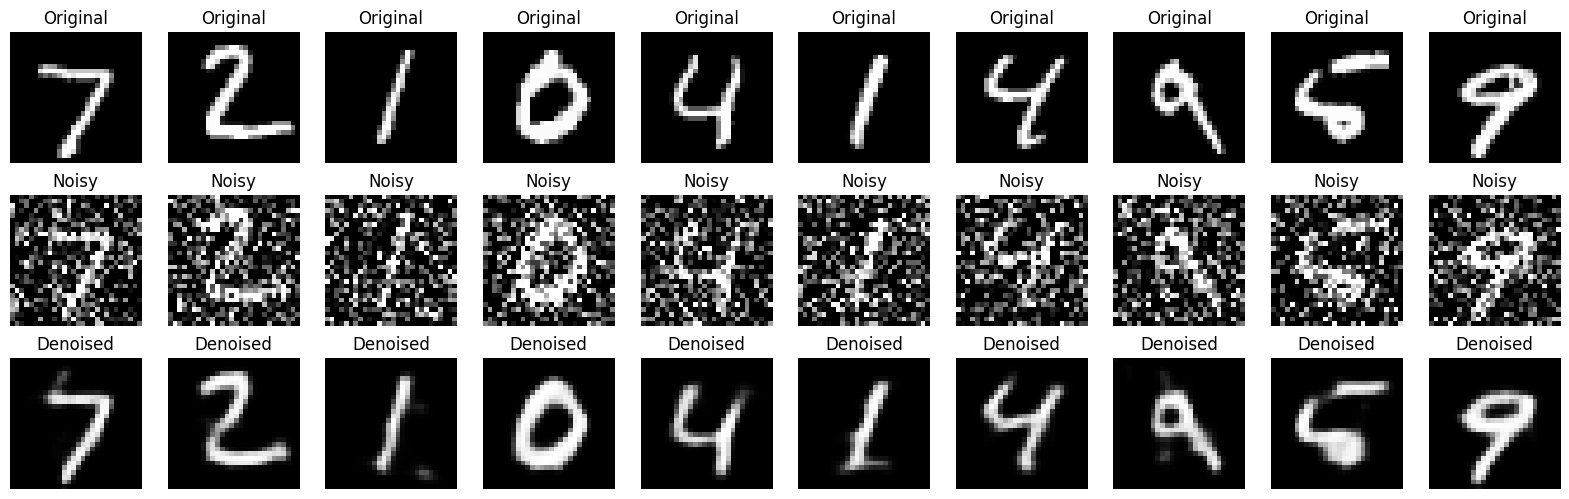

In [7]:
# Denoise the test images
denoised_images = autoencoder.predict(x_test_noisy)

# Function to display images
def display_images(original, noisy, denoised, n=10):
    plt.figure(figsize=(20, 6))
    for i in range(n):
        # Original images
        ax = plt.subplot(3, n, i + 1)
        plt.imshow(original[i].reshape(28, 28), cmap='gray')
        plt.title("Original")
        plt.axis("off")

        # Noisy images
        ax = plt.subplot(3, n, i + 1 + n)
        plt.imshow(noisy[i].reshape(28, 28), cmap='gray')
        plt.title("Noisy")
        plt.axis("off")

        # Denoised images
        ax = plt.subplot(3, n, i + 1 + 2*n)
        plt.imshow(denoised[i].reshape(28, 28), cmap='gray')
        plt.title("Denoised")
        plt.axis("off")
    plt.show()

# Display the images
display_images(x_test, x_test_noisy, denoised_images)